In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gathering Data

In [2]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assessing Data

In [3]:
bike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
bike_df.shape

(183412, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [7]:
bike_df.start_station_name.value_counts().nlargest(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

In [8]:
bike_df.start_time.sample(40)

176766    2019-02-02 10:11:16.9110
45106     2019-02-22 13:02:23.8770
166651    2019-02-04 18:18:00.3510
172226    2019-02-03 16:53:33.7990
11004     2019-02-27 19:19:07.3310
59149     2019-02-20 21:04:09.9840
181492    2019-02-01 09:14:50.9210
98146     2019-02-15 08:05:22.9670
73140     2019-02-19 14:36:05.2380
64255     2019-02-20 12:39:45.1130
110074    2019-02-12 18:10:11.6750
169468    2019-02-04 09:55:59.6910
84229     2019-02-17 18:19:22.9840
26782     2019-02-25 11:18:04.2060
69678     2019-02-19 18:52:15.6980
17515     2019-02-27 05:35:10.4990
85958     2019-02-17 14:02:02.3710
89210     2019-02-16 15:51:22.5670
142491    2019-02-07 16:59:55.7980
178233    2019-02-01 17:35:10.1090
22369     2019-02-26 08:11:49.2620
25593     2019-02-25 16:41:25.7530
12291     2019-02-27 17:47:38.6880
57229     2019-02-21 08:22:25.5340
33189     2019-02-24 12:38:18.3000
139030    2019-02-07 22:36:11.0590
151254    2019-02-06 17:24:29.4940
164257    2019-02-05 08:35:48.1410
49867     2019-02-21

### Qualities issues:
* The start_time and end_time datatype need to be change from object to datetime type. However, it's seems this data for February of 2019 or there is a mistake in the data.
* There are columns that need to be dropped, since it won't be part of the analysis (start_station_id, start_station_latitude, start_station_longitude, end_station_id,bike_id, end_station_latitude, end_station_longitude)

## Cleaning Data

In [9]:
# making copy of the data
bike_df_clean = bike_df.copy()

#### Define
start_time and end_time datatype need to be change from object to datetime type.
#### code

In [10]:
time_ls = ['start_time','end_time']
for i in time_ls:
    bike_df_clean[i] = pd.to_datetime(bike_df_clean[i])

#### Test

In [11]:
bike_df_clean[time_ls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


#### Define
There are columns that need to be dropped, since it won't be part of the analysis (start_station_id, start_station_latitude, start_station_longitude, end_station_id,bike_id, end_station_latitude, end_station_longitude)
#### Code

In [12]:
column_dp = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','bike_id',
             'end_station_latitude', 'end_station_longitude']
bike_df_clean.drop(columns= column_dp, inplace= True)

#### Test

In [13]:
bike_df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


## Univariate Exploration

Even though the Data has been cleaned, there some adjustments that will be done during this step to fit our analysis

### Trip Duration Average
How long dose the ride usually take?, this is one of the Important questions that can be asked. With the fallowing analysis will get the average of trips by minutes (since people tend to prefer to use minutes when biking).

The fallowing graph shows that the average duration that the bike token by the user. This is shows that majority of the trip take around 10 from 5 min to 15 min. 

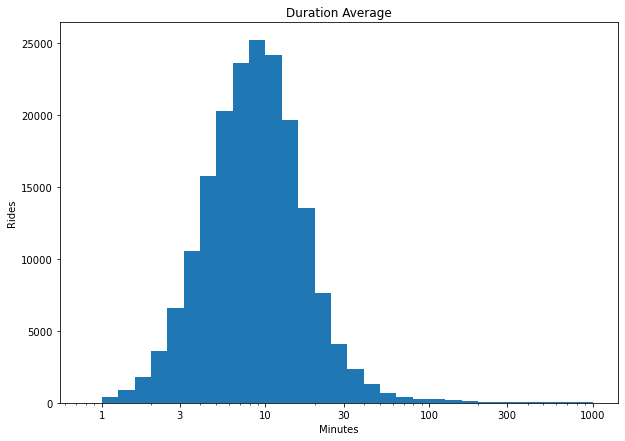

In [14]:
# Convert duration_sec into new column duration_min.
plt.figure(figsize=(10,7))
bike_df_clean['duration_min'] = bike_df_clean['duration_sec'] / 60
bins = 10 ** np.arange(-0.1, 3+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data= bike_df_clean, x = 'duration_min', bins= bins)
plt.title('Duration Average')
plt.ylabel('Rides')
plt.xlabel('Minutes')
plt.xscale('log')
plt.xticks(ticks, labels);

This is shows that majority of the trip take around 10 from 5 min to 15 min 

### Subscriber vs Customer

Who is usually use our bike, subscribers or customers?. This question will be answer in the next analysis. 

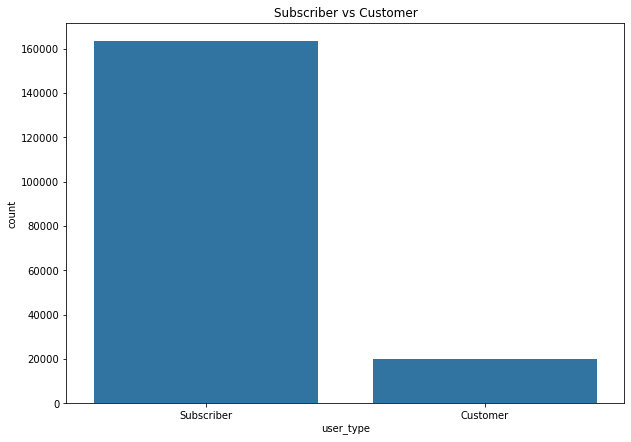

In [15]:
plt.figure(figsize=(10,7))
base_color = sns.color_palette()[0]
orders = bike_df_clean.user_type.value_counts().index
plt.title('Subscriber vs Customer')
sns.countplot(data= bike_df_clean, x = 'user_type', color= base_color, order= orders);

This is shows that the majority of bikers are subscriber.

### Ride during February 2019
* which date do we have more users?

* When shall we schedule our maintenance? (so it dosn't effect the business.)

To answer these questions trip per date/day. The below graph shows that the trips counts during February 2019. There are some dates which shows near to 10000 trip and there are other which show around 3000 trips. 

In [16]:
bike_df_clean['start_date'] = pd.to_datetime(bike_df_clean['start_time']).dt.date

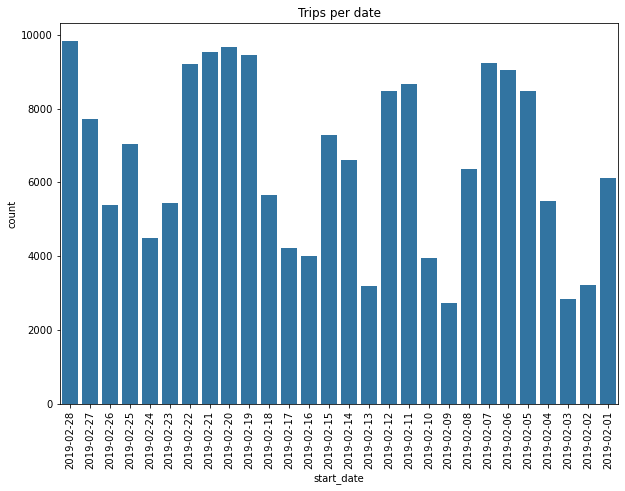

In [17]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.title('Trips per date')
sns.countplot(data= bike_df_clean, x = 'start_date', color= base_color);

This is shows the date. However, having day name would be more useful for our analysis.

In [18]:
# create column for days
bike_df_clean['start_day'] = pd.DatetimeIndex(bike_df_clean['start_date']).day_name()

In [19]:
bike_df_clean.start_day.value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

### Busy days
The below graph shows that during the working days there are more trips than the weekend. This is also shows that the highest trips would be during Thursday. Moreover, the lowest number of trip would be on Sunday and Saturday

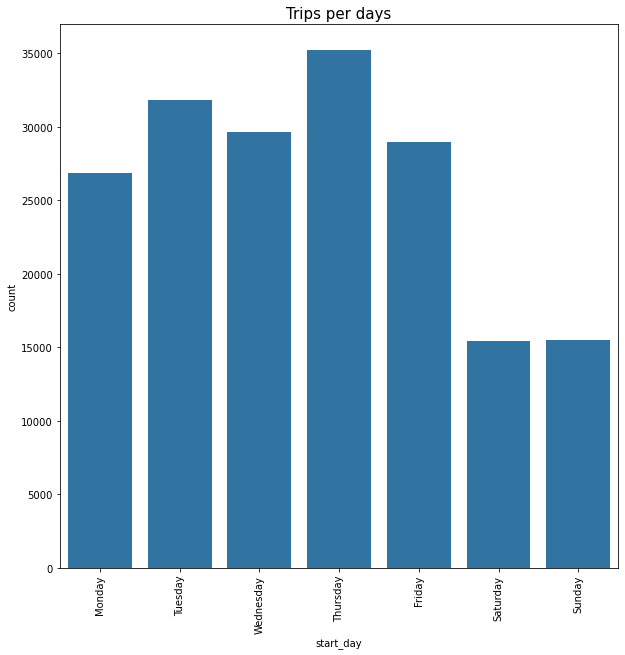

In [20]:

orders = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Trips per days', size= 15)
sns.countplot(data= bike_df_clean, x = 'start_day', color= base_color, order=orders);

## Bivariate Exploration

### Ride duration during this month
Here we notice that during the month ride duration it's highest on around 09-02-2019, 17-02-2019 and 23-02-2019. This is date during our analysis  these days with highest durations, shows less trip count. Users during this time tend to keep the bikes with them more than other dates.

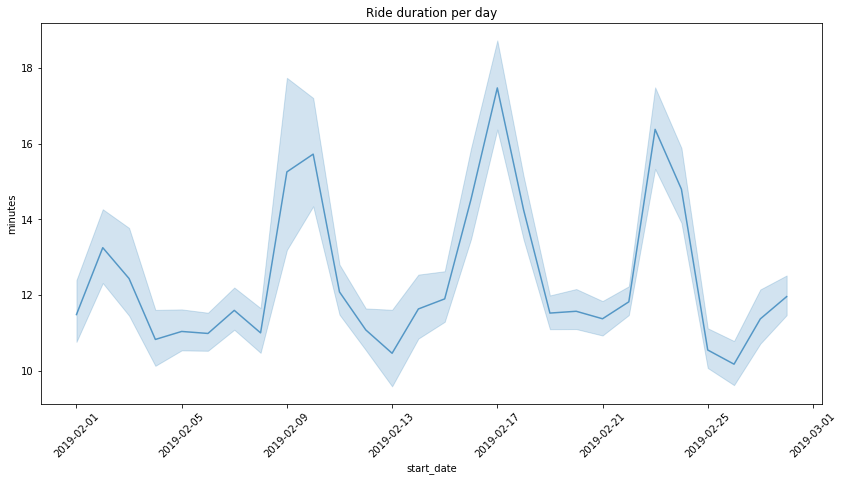

In [21]:
plt.figure(figsize=(14,7))
orders = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('Ride duration per day')
plt.ylabel('minutes')
plt.xticks(rotation=45)
sns.lineplot(data= bike_df_clean, x = 'start_date', y= 'duration_min', alpha=0.7);


### Genders users

Males show up to have trip more than other genders.

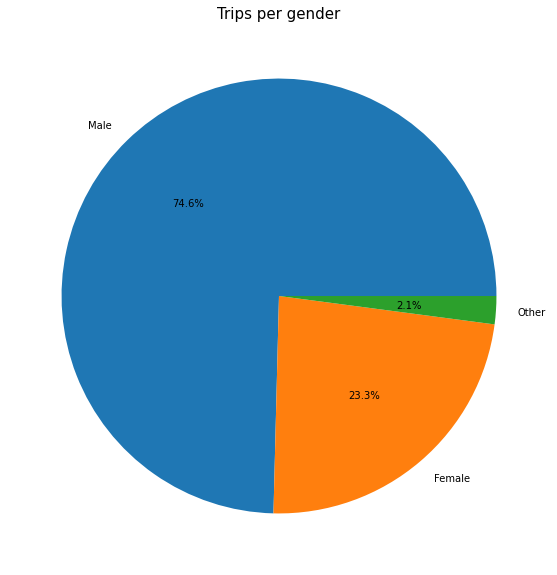

In [22]:
bike_df_clean.member_gender.value_counts().plot(kind='pie',figsize=(10,10), fontsize=10, autopct='%1.1f%%')
plt.title('Trips per gender', size= 15)
plt.ylabel('')
plt.xlabel('');


The majority of users are male with the percentage of 74.6%. 

### Trip Duration(min) Vs Date and Gender
Does gender effect the the duration during specific date? 

This analysis show that the gender doesn't effect the trip duration, as the majority of genders take trip less than 400 minutes during this month. With this being said, there are quite a good number between 400 up to 1200. However, the user's trip duration keeps getting less as the time pass 1200 min

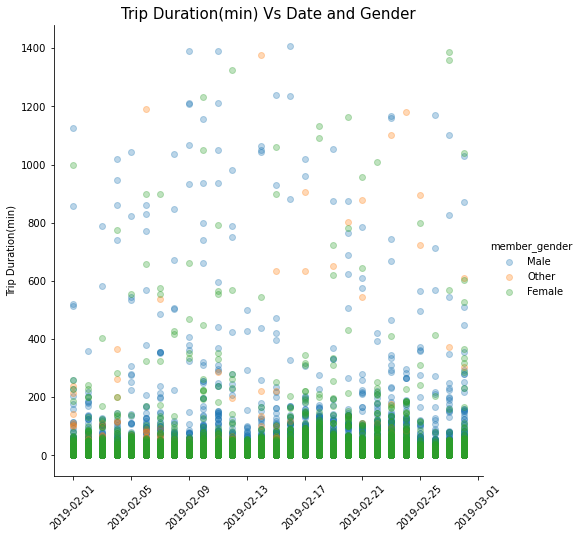

In [23]:

g = sns.FacetGrid(data =  bike_df_clean, hue = 'member_gender', height = 7)
g.map(plt.scatter, 'start_date','duration_min', alpha = 0.3)
g.add_legend()
plt.title('Trip Duration(min) Vs Date and Gender', size= 15)
plt.ylabel('Trip Duration(min)')
plt.xticks(rotation=45)
plt.xlabel('');

#### Noticed during the analysis
* These data showes only the month of February of 2019, having date which shows the activity during the year will help us get more accurate results.
* During the weekend the trip the hightest duration bikers use the bike it has less trip count (raise question if the compnay need to provide more bikes for these days)